### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [130]:
import pandas as pd
print(pd.__version__)

2.2.3


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [131]:
path = "data/data_draw_korea.csv"

df = pd.DataFrame(pd.read_csv(path))

df

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [132]:
# head() 함수

df.head(2)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [133]:
# tail() 함수

df.tail(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [134]:
# sample() 함수

df.sample()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시


In [135]:
# 컬렴명 확인하기
print(df.columns)

# 인덱스 확인하기
df.index


Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


RangeIndex(start=0, stop=229, step=1)

In [136]:
print(type(df.values))

# values 속성으로 값 확인하기
df.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [137]:
# info() 함수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [138]:
# 모든 컬럼의 타입 확인
df.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [139]:
# 면적 컬럼의 타입을 확인
print(type(df['면적']))
df['면적'].dtype

<class 'pandas.core.series.Series'>


dtype('float64')

In [140]:
# 특정컬럼(인구수)의 타입 확인
print(type(df['인구수']))
df['인구수'].dtype

<class 'pandas.core.series.Series'>


dtype('int64')

In [141]:
import numpy as np

# == df.describe()
df.describe(include=[np.number])

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [142]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
df.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [143]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
df.describe(include=[object])

,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,중구
freq,1,31,6


In [144]:
df['행정구역'] == '동구'


0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [145]:
# 해당 조건식과 매칭되는 Row data 출력
df.loc[df['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [146]:
# '광역시도' == '경기도'
df.loc[df['광역시도'] == '경기도']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
18,18,53497,가평,9,3,843.040,경기도,가평군
19,19,955384,고양,4,2,267.330,경기도,고양시
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시
26,26,610300,남양주,8,3,458.440,경기도,남양주시
27,27,90398,동두천,7,2,95.680,경기도,동두천시


In [147]:
# describe() 함수, 모든 컬럼의 통계함수 출력
df.describe(include='all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,중구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [148]:
print(type(df['인구수']))
# 인구수 1개의 컬럼 선택
df['인구수']

<class 'pandas.core.series.Series'>


0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [149]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
df[['행정구역', '인구수', '면적']]

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25
...,...,...,...
224,제천시,127462,882.47
225,증평군,34480,81.84
226,진천군,62809,406.08
227,청주시,790216,932.51


In [150]:
# 인구수 가장 많은 행정구역 TOP 5
df[['행정구역', '인구수', '면적']]\
    .sort_values(by='인구수', ascending=False).head(5)\
        .reset_index(drop=True)

,행정구역,인구수,면적
0,수원시,1125461,121.09
1,창원시,1010040,734.87
2,고양시,955384,267.33
3,용인시,915005,591.50
4,성남시,911628,141.82


In [151]:
# 인구수 가장 적은 행정구역 TOP 5
df[['행정구역', '인구수', '면적']]\
    .sort_values(by='인구수', ascending=True).head(5)\
        .reset_index(drop=True)

,행정구역,인구수,면적
0,울릉군,8392,72.82
1,영양군,16009,815.11
2,옹진군,17735,164.30
3,장수군,20492,533.64
4,군위군,20596,614.15


In [152]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {df['인구수'].max():,}")
print(f"인구수 최소값 {df['인구수'].min():,}")
print(f"인구수 평균 {round(df['인구수'].mean()):,}")
print(f"인구수 표준편차 {round(df['인구수'].std()):,}")
print(f"인구수 중간값 {df['인구수'].median():,}")
df['인구수'].quantile([0.25, 0.75])

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [153]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_prop 변수에 저장
max_prop = df['인구수'].max()

df.loc[df['인구수'] == max_prop]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [154]:
# 면적이 넓은 행정구역?
df.loc[df['면적'] == df['면적'].max()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
15,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [155]:
# 인구수가 가장 적은 행정구역?
df.loc[df['인구수'] == df['인구수'].min()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [156]:
# unique한 광역시도명
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [157]:
# 광역시도별 Row Counting
df['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
광주광역시       5
대전광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [158]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']
# 컬럼의 데이터 출력하기
df.loc[df['광역시도'] == '경기도', ['행정구역', '인구수', '면적']]\
    .sort_values(by='인구수', ascending=False)\
        .reset_index(drop=True)

,행정구역,인구수,면적
0,수원시,1125461,121.090
1,고양시,955384,267.330
2,용인시,915005,591.500
3,성남시,911628,141.820
4,부천시,805473,53.440
5,안산시,668089,144.780
6,남양주시,610300,458.440
7,안양시,566558,58.520
8,화성시,555129,688.100
9,평택시,423763,452.310


In [159]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  
# 컬럼의 데이터를 면적을 descending 순서대로 출력하기

df.loc[df['광역시도'] == '경기도', ['행정구역', '인구수', '면적']]\
    .sort_values(by='면적', ascending=False)\
        .reset_index(drop=True)

,행정구역,인구수,면적
0,양평군,95614,877.080
1,가평군,53497,843.040
2,포천시,140159,826.380
3,연천군,41076,695.230
4,화성시,555129,688.100
5,파주시,385528,672.560
6,여주시,100669,608.640
7,용인시,915005,591.500
8,안성시,173061,554.200
9,이천시,190537,461.020


In [160]:
# Pandas 의 map() 함수


In [161]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를
# descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]

gy_df = df.loc[df["광역시도"] == "경기도", ['행정구역', '인구수', '면적']]\
    .sort_values(by='인구수', ascending=False).reset_index(drop=True)

# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2'] = gy_df['인구수'].map(lambda n: "{:,}".format(n))

gy_df.head(3)



,행정구역,인구수,면적,인구수2
0,수원시,1125461,121.09,"1,125,461"
1,고양시,955384,267.33,"955,384"
2,용인시,915005,591.50,"915,005"


In [162]:
# 면적2 라는 새로운 컬럼을 생성
gy_df['면적2'] = gy_df['면적'].map(lambda val:f"{val:.2f}")
gy_df[['면적', '면적2']].head(3)

,면적,면적2
0,121.09,121.09
1,267.33,267.33
2,591.50,591.50


In [163]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성
# area_1000 라는 변수에 저장하기
area_1000 = df.loc[df['면적'] > 1000].copy()

# area_1000 DataFrame 객체에 면적2 컬럼을 생성
area_1000['면적2'] = area_1000['면적'].map(lambda x : f"{round(x)}")

area_1000


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,면적2
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,1040
3,3,63986,삼척,11,8,1185.80,강원도,삼척시,1186
7,7,34966,영월,10,8,1127.36,강원도,영월군,1127
9,9,29260,인제,9,2,1646.08,강원도,인제군,1646
10,10,34242,정선,11,6,1220.67,강원도,정선군,1221
12,12,264144,춘천,10,3,1116.35,강원도,춘천시,1116
14,14,38439,평창,10,6,1463.65,강원도,평창군,1464
15,15,62957,홍천,10,4,1817.94,강원도,홍천군,1818
68,68,242618,경주,12,12,1323.85,경상북도,경주시,1324
72,72,127941,김천,8,11,1009.56,경상북도,김천시,1010


In [164]:
area_1000 = df.loc[df['면적'] > 1000].copy()

area_1000.loc[area_1000['면적'] > 1500, '면적2'] = area_1000['면적'].map('{:,}'.format)

area_1000

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,면적2
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,NaN
3,3,63986,삼척,11,8,1185.80,강원도,삼척시,NaN
7,7,34966,영월,10,8,1127.36,강원도,영월군,NaN
9,9,29260,인제,9,2,1646.08,강원도,인제군,"1,646.08"
10,10,34242,정선,11,6,1220.67,강원도,정선군,NaN
12,12,264144,춘천,10,3,1116.35,강원도,춘천시,NaN
14,14,38439,평창,10,6,1463.65,강원도,평창군,NaN
15,15,62957,홍천,10,4,1817.94,강원도,홍천군,"1,817.94"
68,68,242618,경주,12,12,1323.85,경상북도,경주시,NaN
72,72,127941,김천,8,11,1009.56,경상북도,김천시,NaN


In [165]:
#경기도 인구수의 평균과 표준편차
p_df = df.loc[df['광역시도'] == '경기도', ['인구수']].reset_index(drop=True)

avg_result = p_df.mean()
print(avg_result)
std_result = p_df.std()
print(std_result)

인구수    378845.483871
dtype: float64
인구수    304548.395142
dtype: float64


In [166]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    avg_result = p_df.mean()
    print(f'인구수 평균 : {avg_result}')
    std_result = p_df.std()
    print(f'인구수 편차 : {std_result}')

In [167]:
pop_mean_std(df, '서울특별시')

인구수 평균 : 인구수    378845.483871
dtype: float64
인구수 편차 : 인구수    304548.395142
dtype: float64


In [168]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 
for sido_name in df['광역시도'].unique():
    print(sido_name)

강원도
경기도
경상남도
경상북도
광주광역시
대구광역시
대전광역시
부산광역시
서울특별시
세종특별자치시
울산광역시
인천광역시
전라남도
전라북도
제주특별자치도
충청남도
충청북도


In [169]:
#loc[] 사용
#인덱스가 20 부터 25까지
df.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [170]:
#iloc[] 사용
#인덱스가 20 부터 24까지
df.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [171]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지
df.iloc[20:25, 1:]

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시
23,175676,구리,9,4,33.300,경기도,구리시
24,273302,군포,5,8,36.350,경기도,군포시


In [172]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
df.loc[[40, 55, 60], ['인구수', '광역시도', '행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [173]:
#인덱스가 0인 행 하나만 선택
df.loc[0]

Unnamed: 0          0
인구수            202520
shortName          강릉
x                  11
y                   4
면적            1040.07
광역시도              강원도
행정구역              강릉시
Name: 0, dtype: object

In [174]:
#열 하나만 선택
print(type(df['면적']))
df['면적'].head()

<class 'pandas.core.series.Series'>


0    1040.07
1     664.19
2     180.01
3    1185.80
4     105.25
Name: 면적, dtype: float64

### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inplace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inplace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [175]:
print(type(df.columns))
df.columns

<class 'pandas.core.indexes.base.Index'>


Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [176]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함
df.rename(columns={"Unnamed: 0":"seq"}, inplace=False)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [177]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
df.rename(columns={"Unnamed: 0":"seq"}, inplace=True)
df.columns

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [178]:
# seq 컬럼을 인덱스로 변경한다 ( 원본 객체가 변경됨 )
df.set_index('seq', inplace=True)

In [179]:
df.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [180]:
# 인구수의 평균값 구하기
pop_mean_value = df['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

211089.77729257641
211090
211089.78


In [181]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_Lt_df = df.loc[df['인구수'] < pop_mean_value, ['광역시도', '행정구역', '인구수']]\
    .sort_values(by=['광역시도', '인구수'], ascending=[True, False])\
    .reset_index(drop=True).copy()
    
pop_mean_Lt_df.head(3)

,광역시도,행정구역,인구수
0,강원도,강릉시,202520
1,강원도,동해시,86747
2,강원도,속초시,76733


In [182]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_Lt_df.to_excel('data/평균인구수_미만지역.xlsx')

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [183]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
df['인구수'].groupby(df['광역시도']).sum()


광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [184]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
df.groupby('광역시도')

In [185]:
df.groupby('광역시도').sum(numeric_only=True)

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [186]:
# DataFrameGroupBy 
df.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [187]:
# 광역시도별 행정구역별 인구수의 합계
group_df = df.groupby(['광역시도', '행정구역'])['인구수'].sum()\
    .sort_values(ascending=False)

In [188]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df.to_excel("data/광역시도별행정구역별인구수의합계.xlsx", sheet_name="인구수")

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [189]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [190]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [191]:
gy_df.head(2)

,행정구역,인구수,면적,인구수2,면적2
0,수원시,1125461,121.09,"1,125,461",121.09
1,고양시,955384,267.33,"955,384",267.33


In [192]:
#전국의 면적과 인구수의 상관계수 구하기
corr_result = df['면적'].corr(df['인구수'])
print(corr_result)

-0.346035160504577


In [193]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = df.loc[df['광역시도'] == '서울특별시', ['행정구역','인구수','면적']]
corr_result = seoul_df['면적'].corr(seoul_df['인구수'])
print(corr_result)

0.6644268188909778


In [194]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df = df.loc[df['광역시도'] == '경기도', ['행정구역','인구수','면적']]
corr_result = gy_df['면적'].corr(gy_df['인구수'])
print(corr_result)

-0.21572485071590813


#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [195]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
df.groupby('광역시도')['인구수'].agg([ 'max', 'mean', 'std', 'min',]).fillna(0)\
    .sort_values(by="std", ascending=False)

,max,mean,std,min
광역시도,,,,
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
충청북도,790216,134974.545455,223460.356657,27130
제주특별자치도,430504,287936.500000,201620.892054,145369
인천광역시,527153,276657.500000,199353.596491,17735
대구광역시,584517,297306.250000,174375.394380,74950
전라북도,630708,124217.714286,168327.134821,20492
충청남도,584912,129741.933333,141125.108080,29671
광주광역시,439683,287641.800000,137076.683206,97571


In [196]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
agg_group_df = df.groupby('광역시도')['인구수'].agg(['max', 'mean', 'std']).fillna(0)\
    .sort_values(by="std", ascending=False)
agg_group_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
충청북도,790216,134974.545455,223460.356657
제주특별자치도,430504,287936.500000,201620.892054
인천광역시,527153,276657.500000,199353.596491
대구광역시,584517,297306.250000,174375.394380
전라북도,630708,124217.714286,168327.134821
충청남도,584912,129741.933333,141125.108080
광주광역시,439683,287641.800000,137076.683206


In [197]:
# DataFrame의 style.format() 함수 사용하기
agg_group_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


In [198]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
agg_group_df['mean'] = agg_group_df['mean'].map('{:.2f}'.format)
agg_group_df['std'] = agg_group_df['std'].map('{:.2f}'.format)
agg_group_df.head()

,max,mean,std
광역시도,,,
경기도,1125461,378845.48,304548.40
경상남도,1010040,174693.72,245796.47
충청북도,790216,134974.55,223460.36
제주특별자치도,430504,287936.50,201620.89
인천광역시,527153,276657.50,199353.60


#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [199]:
%matplotlib inline

In [200]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.9.4
seaborn  0.13.2


In [201]:
# for font in fm.fontManager.ttflist:
#     print((font.name, font.fname))
# 폰트이름과 폰트파일 정보 출력 list comprehension 
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Hancom MalangMalang', 'C:\\Windows\\Fonts\\MalangmalangB.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Hancom MalangMalang', 'C:\\Windows\\Fonts\\MalangmalangR.ttf')]

In [202]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
path = "C:\\Windows\\Fonts\\malgunsl.ttf"

#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=path).get_name()

print(font_prop)

Malgun Gothic


In [203]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_prop)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [204]:
seoul_df = df.loc[df['광역시도'] == '서울특별시']
seoul_df.head(5)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구
127,554709,서울강서,4,4,41.4,서울특별시,강서구
128,484478,서울관악,5,6,29.6,서울특별시,관악구


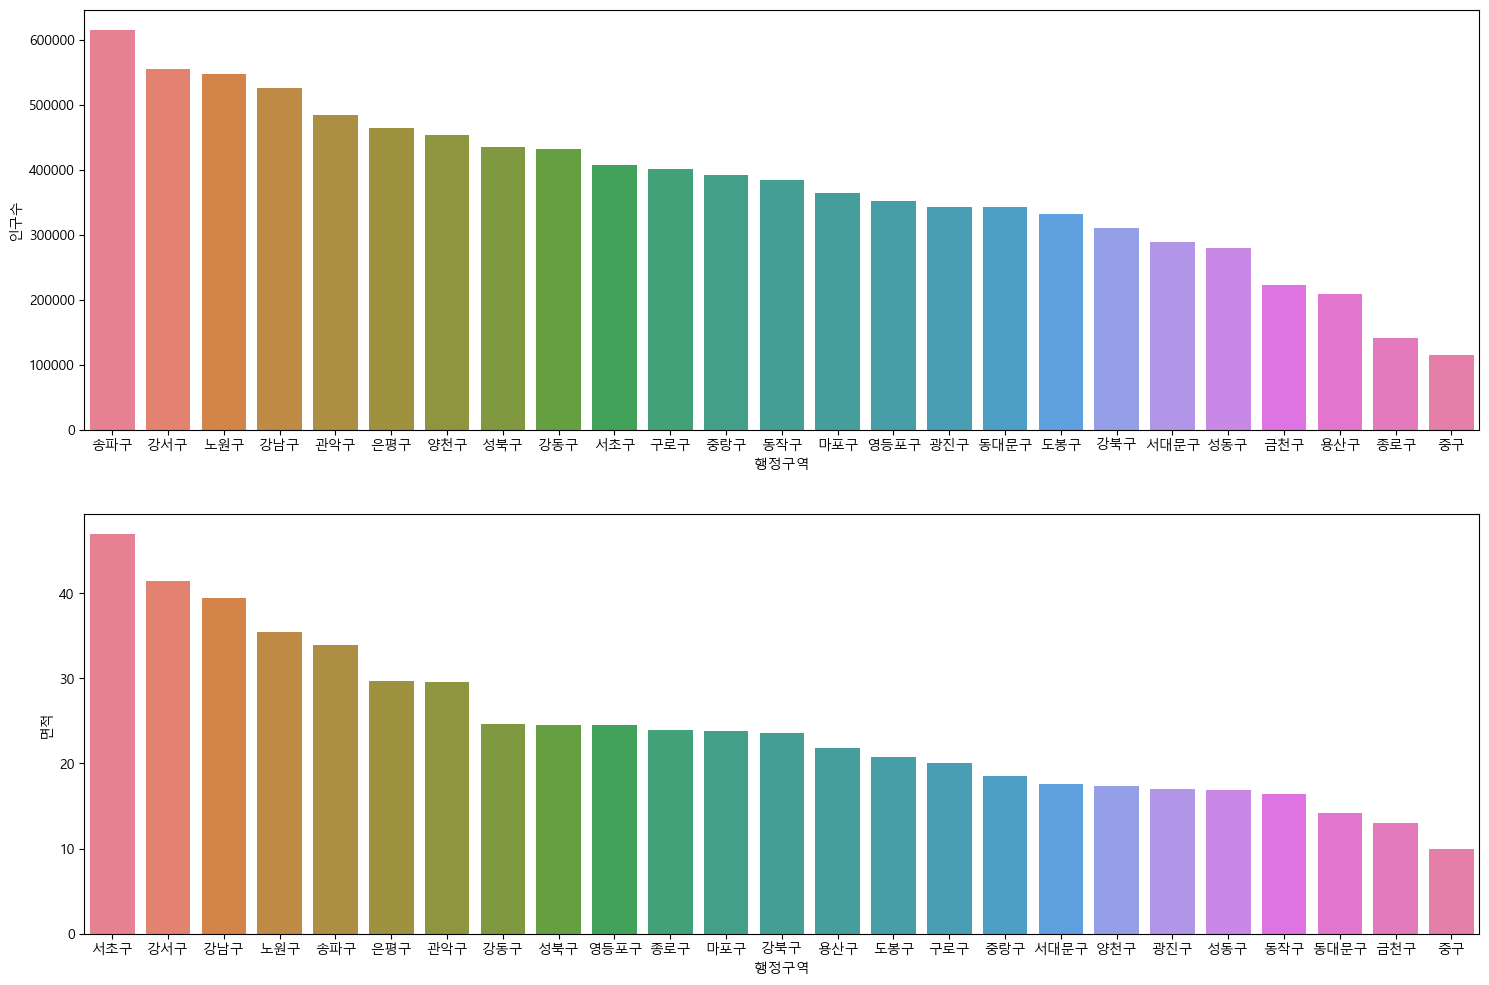

In [205]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
# 가로로 2개 그래프 생성
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 12)

# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False)\
    , x='행정구역', y='인구수', ax=axes1, hue='행정구역')

# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False),\
    x='행정구역', y='면적', ax=axes2, hue='행정구역')

plt.show()


In [206]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    
    sido_df = df.loc[df['광역시도'] == sido_name]
    
    # subplots() 함수를 사용하여 axes 객체를 생성하기
    # 가로로 2개 그래프 생성
    figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18, 12)

    # seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
    plot1 = sns.barplot(data=sido_df.sort_values(by='인구수', ascending=False)\
        , x='행정구역', y='인구수', ax=axes1, hue='행정구역')
    plot1.set_title("행정구역별 인구수")

    # seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
    plot2 = sns.barplot(data=sido_df.sort_values(by='면적', ascending=False),\
        x='행정구역', y='면적', ax=axes2, hue='행정구역')
    plot2.set_title("행정구역별 면적")

    plt.show()


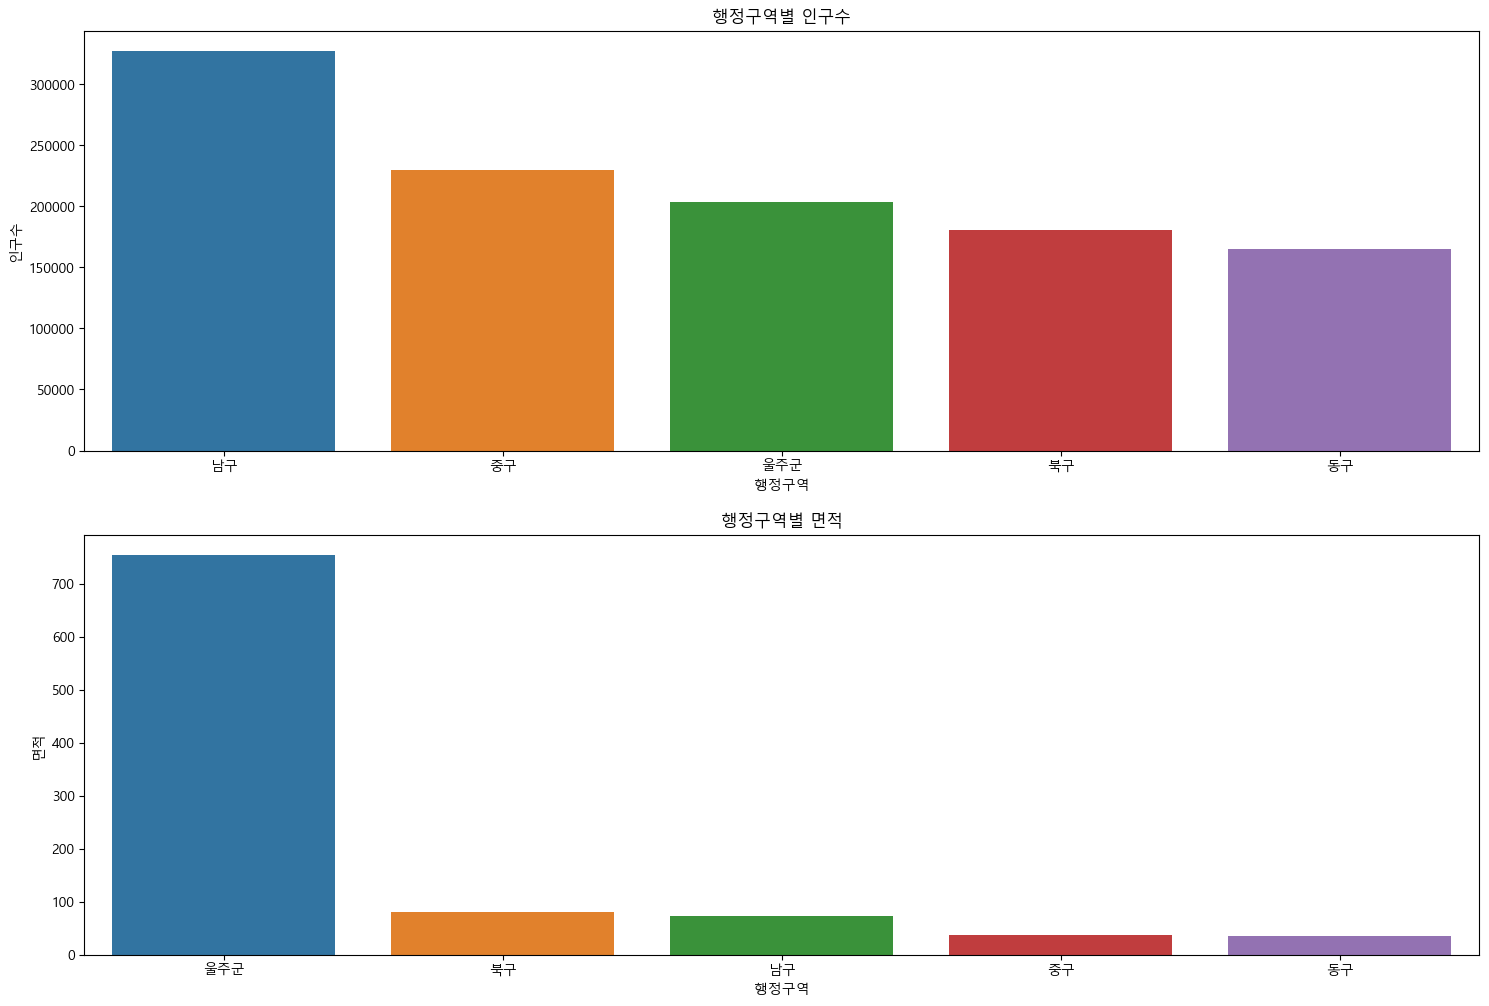

In [207]:
show_pop_area('울산광역시')

In [208]:
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

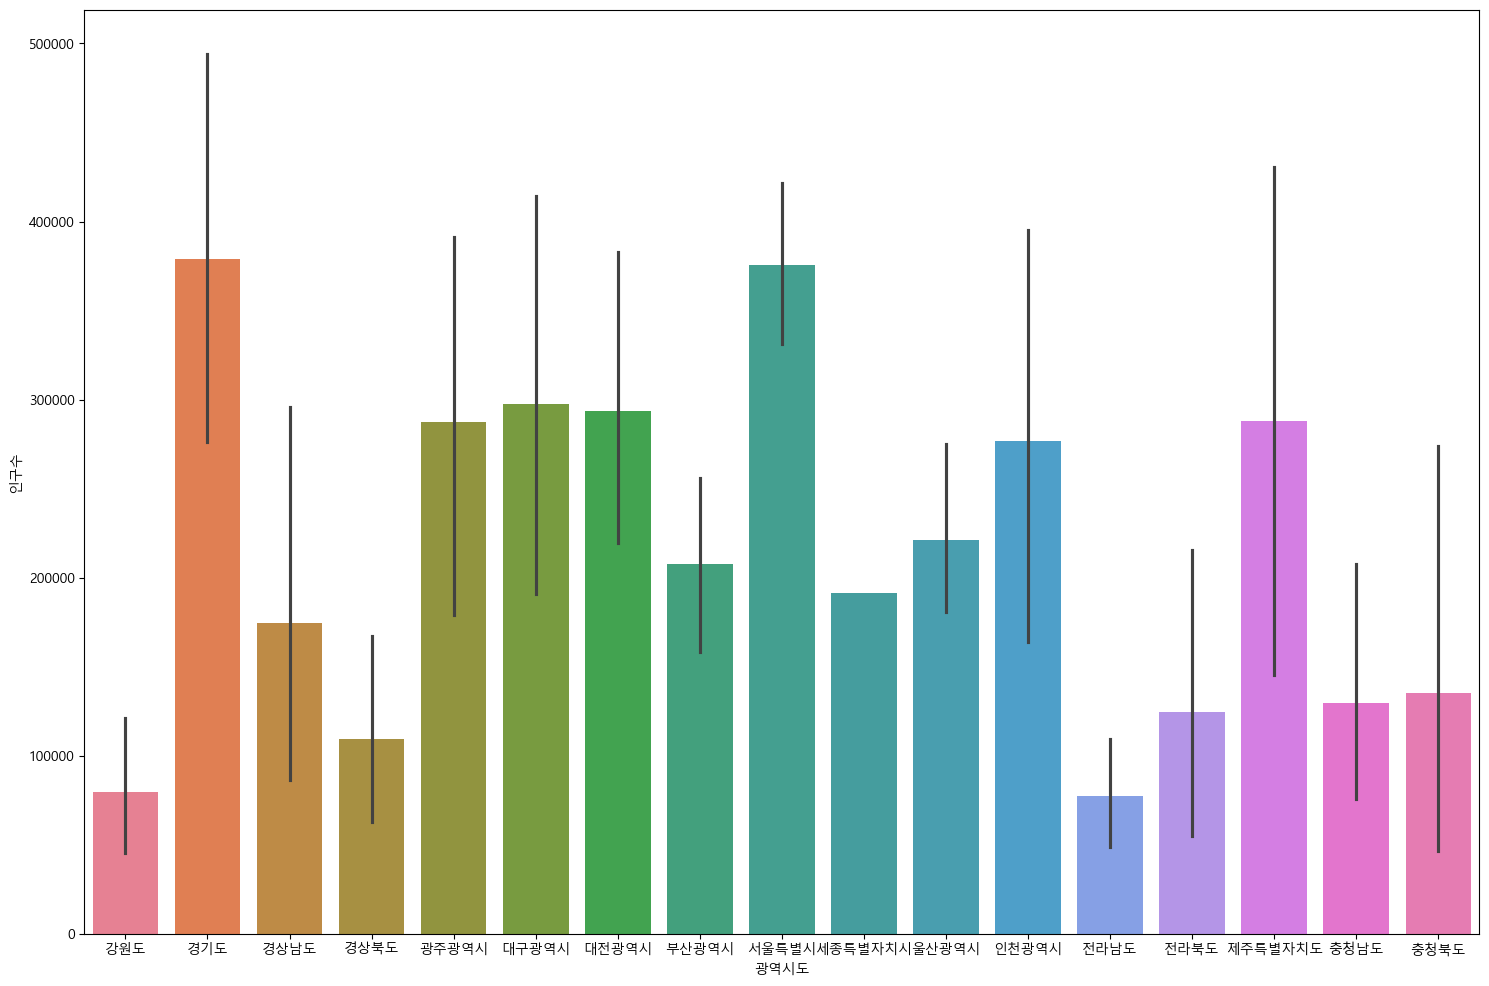

In [209]:
# 전국데이터의 광역시도의 인구수 

figure, axes1 = plt.subplots(1, 1)
figure.set_size_inches(18, 12)

figure = sns.barplot(x="광역시도", y="인구수", data=df, ax=axes1, hue="광역시도")
plt.show()

In [211]:
print(type(seoul_df['인구수'].items()))
seoul_df['인구수'].items()

<class 'zip'>


In [ ]:
for i, v in enumerate(seoul_df["인구수"].items()):
    print(i, v[1])

Text(0, 0, '강남구')
Text(1, 0, '강동구')
Text(2, 0, '강북구')
Text(3, 0, '강서구')
Text(4, 0, '관악구')
Text(5, 0, '광진구')
Text(6, 0, '구로구')
Text(7, 0, '금천구')
Text(8, 0, '노원구')
Text(9, 0, '도봉구')
Text(10, 0, '동대문구')
Text(11, 0, '동작구')
Text(12, 0, '마포구')
Text(13, 0, '서대문구')
Text(14, 0, '서초구')
Text(15, 0, '성동구')
Text(16, 0, '성북구')
Text(17, 0, '송파구')
Text(18, 0, '양천구')
Text(19, 0, '영등포구')
Text(20, 0, '용산구')
Text(21, 0, '은평구')
Text(22, 0, '종로구')
Text(23, 0, '중구')
Text(24, 0, '중랑구')


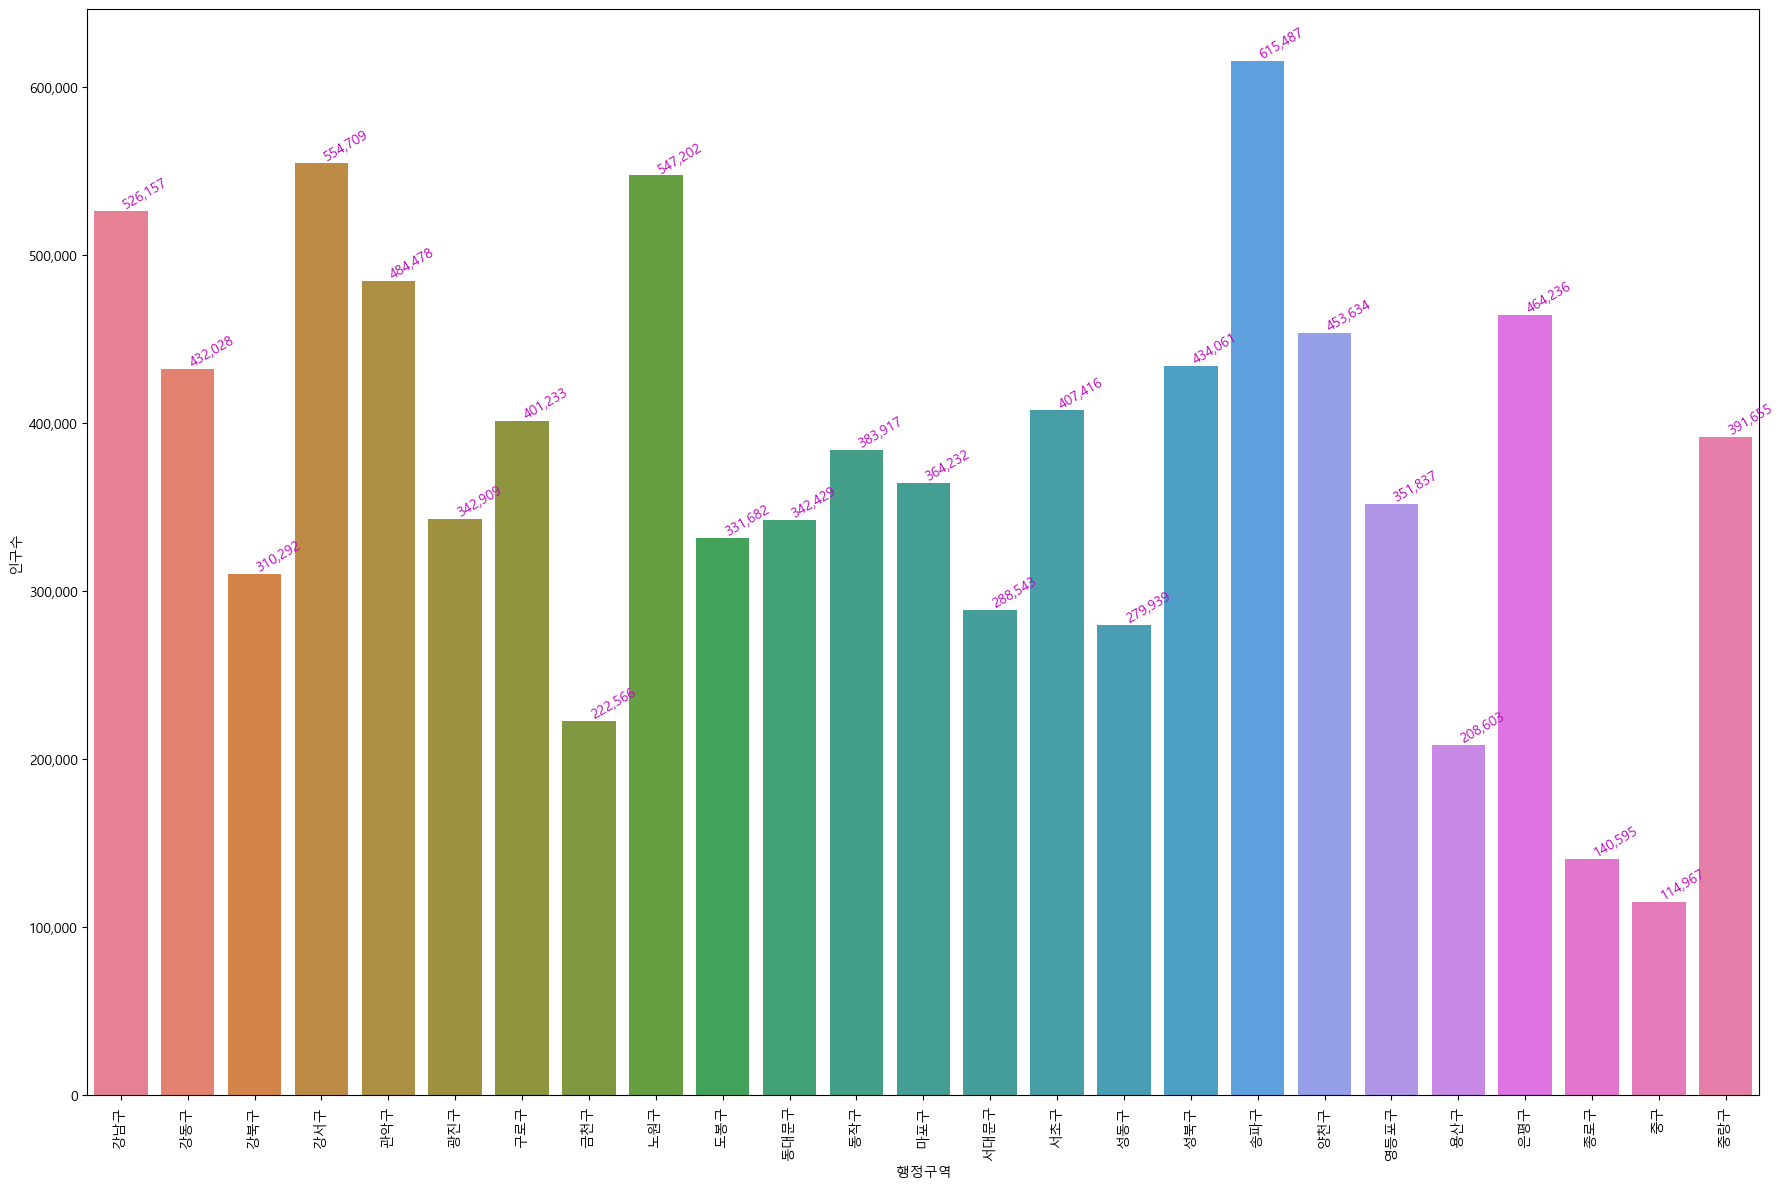

In [ ]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

# y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


for item in ax1.get_xticklabels(): 
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].items()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=30)
plt.tight_layout()
plt.show()

In [217]:
# plot 을 image 파일로 저장하기
figure.savefig("data/서울인구수1.png",  bbox_inches="tight")
figure.savefig("data/서울인구수2.png")